In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
pokemon_df = pd.read_csv('/content/Pokemon.csv') #this method also create a DataFrame file
pokemon_df.head(n=5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


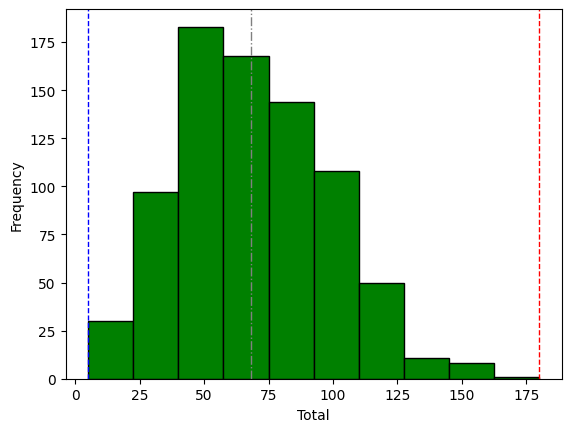

In [5]:
###Create a histogram of column 'Speed'
plt.hist(pokemon_df['Speed'], color = 'green', edgecolor = 'black')
plt.xlabel('Total')
plt.ylabel('Frequency')

###Add min, max, average lines
plt.axvline(pokemon_df["Speed"].mean(), color='grey', linestyle='dashdot', linewidth=1)
plt.axvline(pokemon_df["Speed"].max(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(pokemon_df["Speed"].min(), color='blue', linestyle='dashed', linewidth=1)

#Correlation

Text(0, 0.5, 'Defense')

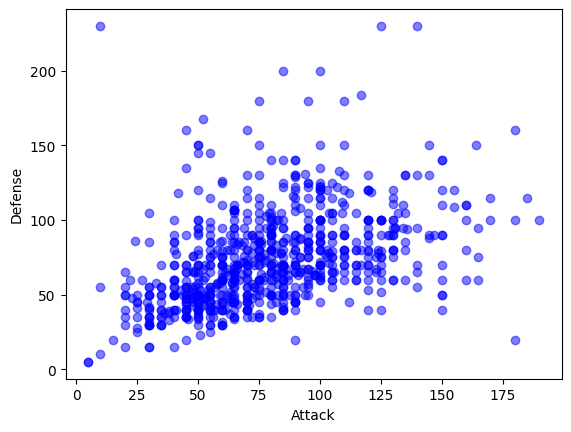

In [9]:
#Scatter plot between variables: attack and defence

plt.scatter(pokemon_df['Attack'], pokemon_df['Defense'], color='blue', alpha=0.5)
plt.xlabel('Attack')
plt.ylabel('Defense')

Text(0, 0.5, 'Defense')

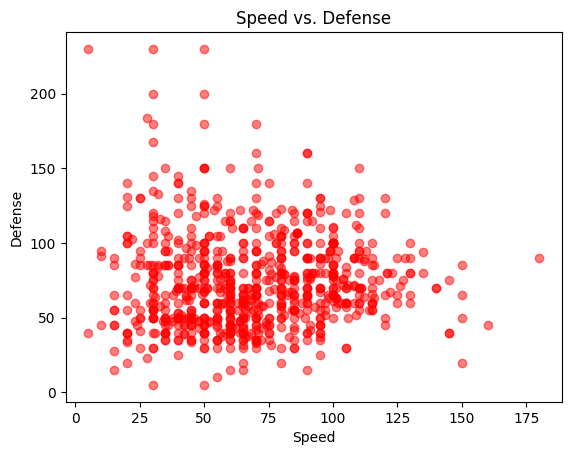

In [12]:
#Create scatterplot for variables speed and defence

plt.scatter(pokemon_df['Speed'], pokemon_df['Defense'], color='red', alpha=0.5)
plt.title('Speed vs. Defense')
plt.xlabel('Speed')
plt.ylabel('Defense')

Text(0, 0.5, 'Defense')

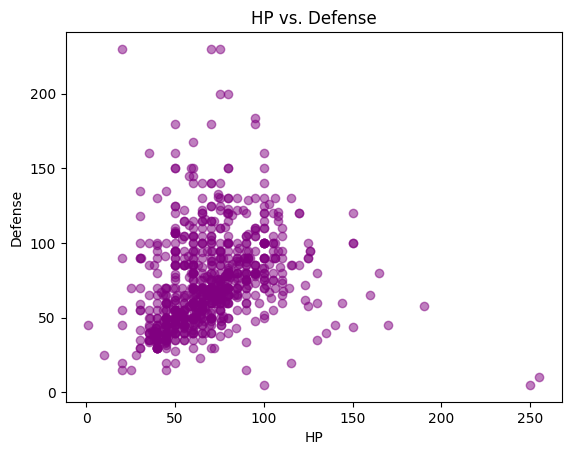

In [14]:
#Create scatterplot for variables HP and Defence

plt.scatter(pokemon_df['HP'], pokemon_df['Defense'], color='purple', alpha=0.5)
plt.title('HP vs. Defense')
plt.xlabel('HP')
plt.ylabel('Defense')

###Pearson correlation

In [16]:
# Result of this correlation is between -1 and 1.
# -1 is perfect negative relationship
# 1 is a positive relationship
# Weak Correlation: 0 to ±0.3
# Moderate Correlation: ±0.3 to ±0.7
# Strong Correlation: ±0.7 to ±1

#Person correlation between Attack/Defense

correlation1 = pokemon_df['Attack'].corr(pokemon_df['Defense'])
correlation1

0.4386870551184892

In [17]:
#Person correlation between Speed/Defense

correlation1 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
correlation1

0.015226598088597448

In [19]:
# Select only numeric columns
numeric_columns = pokemon_df.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop('#', axis=1)
numeric_columns

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6
796,700,50,160,110,160,110,110,6
797,600,80,110,60,150,130,70,6
798,680,80,160,60,170,130,80,6


In [23]:
# iterate  through data with for loop
target_column = 'Attack'
correlation_results = {} # key - column, val=person_correlation
# for loop comparing target column and all other columns in the DataFrame
correlation_results = {} #key = column, val=pearson_correlation
for col in numeric_columns.columns:
  if col == 'Attack':
    continue
  correlation = pokemon_df[target_column].corr(pokemon_df[col])
  correlation_results[col] = correlation

correlation_results

{'Total': 0.7362106519949293,
 'HP': 0.422386028776223,
 'Defense': 0.4386870551184892,
 'Sp. Atk': 0.396361755349232,
 'Sp. Def': 0.26398955110108846,
 'Speed': 0.38123973924108967,
 'Generation': 0.051451336708469686}

# Correlation matrix
### Calculate correlation without for loop

In [24]:
correlation_matrix = numeric_columns.corr() # all columns are numeric
correlation_matrix

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


# Visualizing with seaborn

<Figure size 1000x800 with 0 Axes>

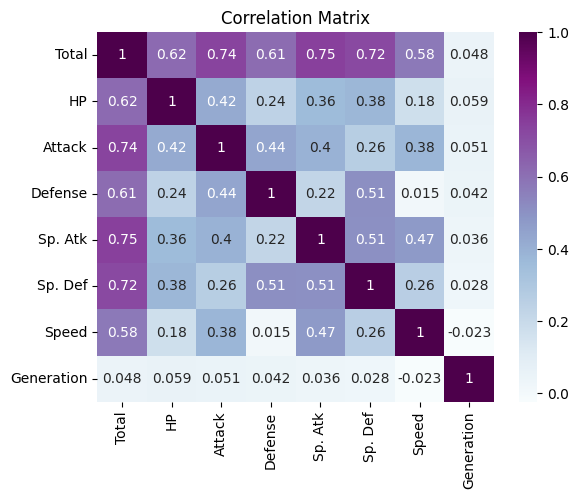

<Figure size 1000x800 with 0 Axes>

In [31]:
import seaborn as sns
# data analys visualization heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu') #annot adds values, cmap - color palletes('inferno', 'Spectral', 'Oranges', 'Set2', 'cubehelix', 'twilight')
plt.title('Correlation Matrix')
plt.figure(figsize=(10, 8)) #change size



###Spurious correlations
###Correlation is not causation
### https://www.tylervigen.com/spurious-correlations






# Linear regression (predict one value based on another)
#https://seaborn.pydata.org/generated/seaborn.regplot.html

<Axes: xlabel='Attack', ylabel='Defense'>

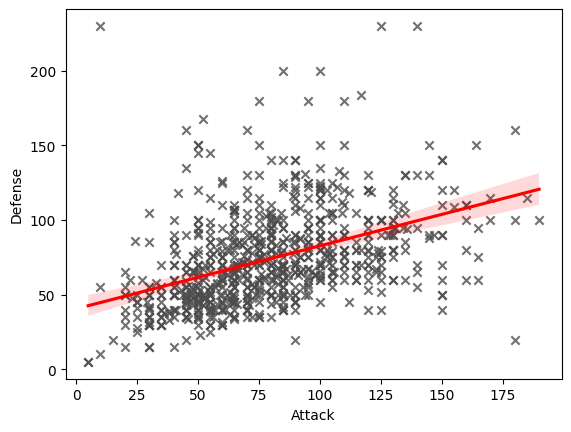

In [35]:
#sns.regplot(x = 'Attack', y = 'Defense', data = pokemon_df)

sns.regplot( # this was taken from site
    data=pokemon_df, x="Attack", y="Defense",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)

Pearson correlation coefficient: 0.015226598088597448


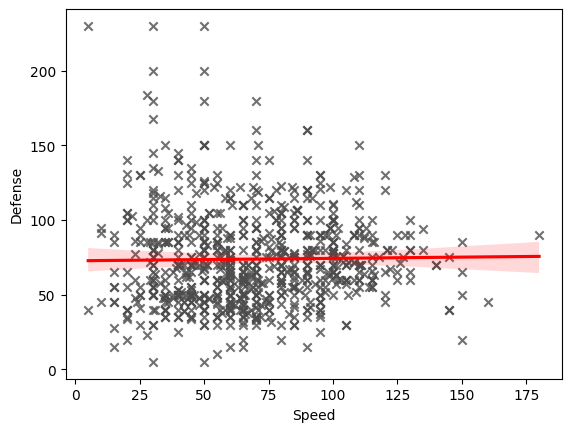

In [39]:
sns.regplot( # this was taken from site
    data=pokemon_df, x="Speed", y="Defense",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)

correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
print('Pearson correlation coefficient:', correlation2)